In [16]:
import os
import requests
import pandas as pd
import io
import utils
import numpy as np
import mplfinance as mpf
from pylab import plt

In [17]:
datos=pd.read_csv("data.csv",index_col=0,parse_dates=True)
datos.index.name = 'Date'
valores= datos.SPY.tolist()


In [18]:
#.2 Calcula las bandas de bollinger

k=2
bandsup=[]
bandinf=[]

In [19]:

for i in range(len(valores)) :
    
    if i>=30:
        ma=sum(valores[i-30:i])/30
        desv=np.std(valores[i-30:i])
        bandsup.append(ma+k*desv)
        bandinf.append(ma-k*desv)
    else:
        bandsup.append(None)
        bandinf.append(None)
        
print(bandsup)
print(datos[30:len(valores)])
print("\n")
print(bandinf)
       

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 475.6180808283517, 475.6847218650792, 475.60116409389985, 475.6462344633455, 475.3393723658965, 475.36172760278606, 475.81657145074485, 477.1468102760651, 478.17360302935856, 479.21473670028837, 479.9058352126895, 480.4880675207723, 481.29646945096835, 482.09412118542645, 482.13007607509854, 482.11880503000964, 481.97468857566383, 481.93781808625494, 482.12222528780575, 482.0902664571571, 481.1840994499953, 480.89891359357074, 480.5646918166889, 481.2827215154658, 482.6219630636085, 484.82705515553414, 486.2380748141111, 487.6955098885674, 489.04020034198527, 490.3794689008479, 490.1278271818685, 489.7751387872455, 489.6705333160074, 489.7045974387301, 489.5479671885801, 489.0270340663403, 488.2362344816182, 486.6296687446046, 485.08665228015883, 483.20346220321227, 481.493638826166, 479.78494433842405, 477.

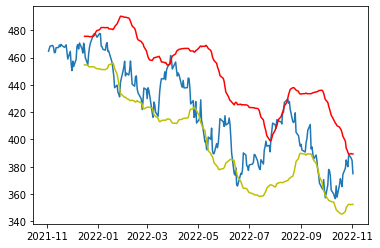

In [20]:
#3. Realiza una figura 
y0=bandsup
y1=bandinf

plt.plot(datos.index, datos.SPY)
plt.plot(datos.index,y0, 'r')
plt.plot(datos.index,y1, 'y')


In [21]:
data=datos
#condicion= -1 por debajo
#condicion=0 enmedio
#condicio= 1 por arriba

In [22]:
compra = []
venta = []
condicion = 0
comprado=0    
for dia in range(30,len(data)):
    if data['SPY'][dia] > bandinf[dia]:
        if condicion == -1 and comprado==0:
            compra.append(data['SPY'][dia])
            venta.append(np.nan)
            condicion = 0
            comprado=1

        elif data['SPY'][dia]>bandsup[dia] and comprado==1:
            venta.append(data['SPY'][dia])
            compra.append(np.nan)
            comprado=0
            condicion=1
            
        elif data['SPY'][dia] > bandinf[dia]:
            condicion=0
            compra.append(np.nan)
            venta.append(np.nan)
        else:
            compra.append(np.nan)
            venta.append(np.nan)

    elif data['SPY'][dia] < bandinf[dia]:
            condicion = -1
            compra.append(np.nan)
            venta.append(np.nan)
    else:
        compra.append(np.nan)
        venta.append(np.nan)



In [23]:
#Ajsutamos longitudes de compra y venta para poder graficar
aux=[]
for i in range(30):
    aux.append(np.nan)
compra=aux+compra
print(len(compra))

252


In [24]:
venta=aux+venta
print(len(venta))


252


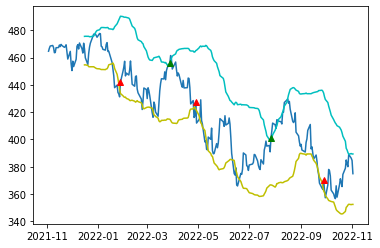

In [25]:
#5. Realiza una figura del código anterior
y0=bandsup
y1=bandinf
y2=compra
y3=venta
plt.plot(datos.index, datos.SPY)
plt.plot(datos.index,y0, 'c')
plt.plot(datos.index,y1, 'y')
plt.plot(datos.index,y2, 'r',marker='^')
plt.plot(datos.index,y3, 'g',marker='^')


In [26]:
#Quitamos los nulos

compra = [x for x in compra if np.isnan(x) == False]
venta = [x for x in venta if np.isnan(x) == False]

In [27]:
if len(compra)!=len(venta):
    compra.pop()
compra

[441.95, 427.81]

In [29]:
#6. Rentabilidad media por accion
rentabilidad=1-sum(venta)/sum(compra)
rentabilidad

0.014728200883002196